In [2]:
# load the iris dataset
# use features 2, 3
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print(X.shape)
y = iris.target
print(y.shape)

(150L, 2L)
(150L,)


In [3]:
# show the unique labels
import numpy as np
np.unique(y)

array([0, 1, 2])

In [4]:
# split into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# standardize using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# train using Perceptron
from sklearn.linear_model import Perceptron
pp = Perceptron(eta0=0.1, n_iter=40, random_state=0)
pp.fit(X_train_std, y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [7]:
# Predict for the test set and show the number misclassified samples
y_pred = pp.predict(X_test_std)
(y_pred != y_test).sum()

4

In [8]:
# show the test set accuracy for the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91111111111111109

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, resolution), np.arange( x2_min, x2_max, resolution)) 
    Z = classifier.predict( np.array([ xx1. ravel(), xx2. ravel()]). T) 
    Z = Z.reshape( xx1. shape) 
    plt.contourf( xx1, xx2, Z, alpha = 0.4, cmap = cmap) 
    plt.xlim( xx1. min(), xx1. max()) 
    plt.ylim( xx2. min(), xx2. max()) 
    # plot all samples
    for idx, cl in enumerate( np.unique( y)):
        plt.scatter( x = X[ y == cl, 0], y = X[ y == cl, 1],
                    alpha = 0.8, c = cmap( idx), 
                    marker = markers[ idx], label = cl)
    # highlight test samples 
    if test_idx:
        X_test, y_test = X[ test_idx, :], y[ test_idx] 
        plt.scatter( X_test[:, 0], X_test[:, 1], c ='', 
                    alpha = 1.0, linewidths = 1, marker ='o', 
                    s = 55, label =' test set')
    

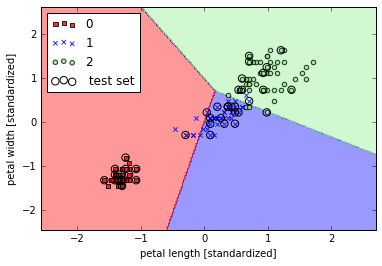

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                     classifier=pp, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0, 6.0,,8.0
10.0,11.0,12.0,'''
print(csv_data)
print(type(csv_data))

In [ ]:
csv_data = unicode(csv_data)
print(csv_data)
print(type(csv_data))

In [ ]:
df =pd.read_csv(StringIO(csv_data))
df

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.values

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis=1)

In [ ]:
df

In [ ]:
df.dropna(subset=['C'])

In [ ]:
df

In [ ]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df)
imputed_data

In [ ]:
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])
df.columns = ['color', 'size', 'price', 'classlabel']
df

In [ ]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

In [ ]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df.classlabel))}
class_mapping

In [ ]:
for a, b in enumerate(np.unique(df.classlabel)):
    print a, b

In [ ]:
{label: idx for idx, label in enumerate(np.unique(df.classlabel))}

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

In [ ]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
inv_class_mapping

In [ ]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y


In [ ]:
class_le.inverse_transform(y)

In [ ]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

In [ ]:
pd.get_dummies(df['color'])

In [ ]:
df

In [ ]:
|